<a href="https://colab.research.google.com/github/Forrward/LABbl/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [117]:
!pip install datasets seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("Real estate valuation data set.xlsx")#чтение файла
df


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

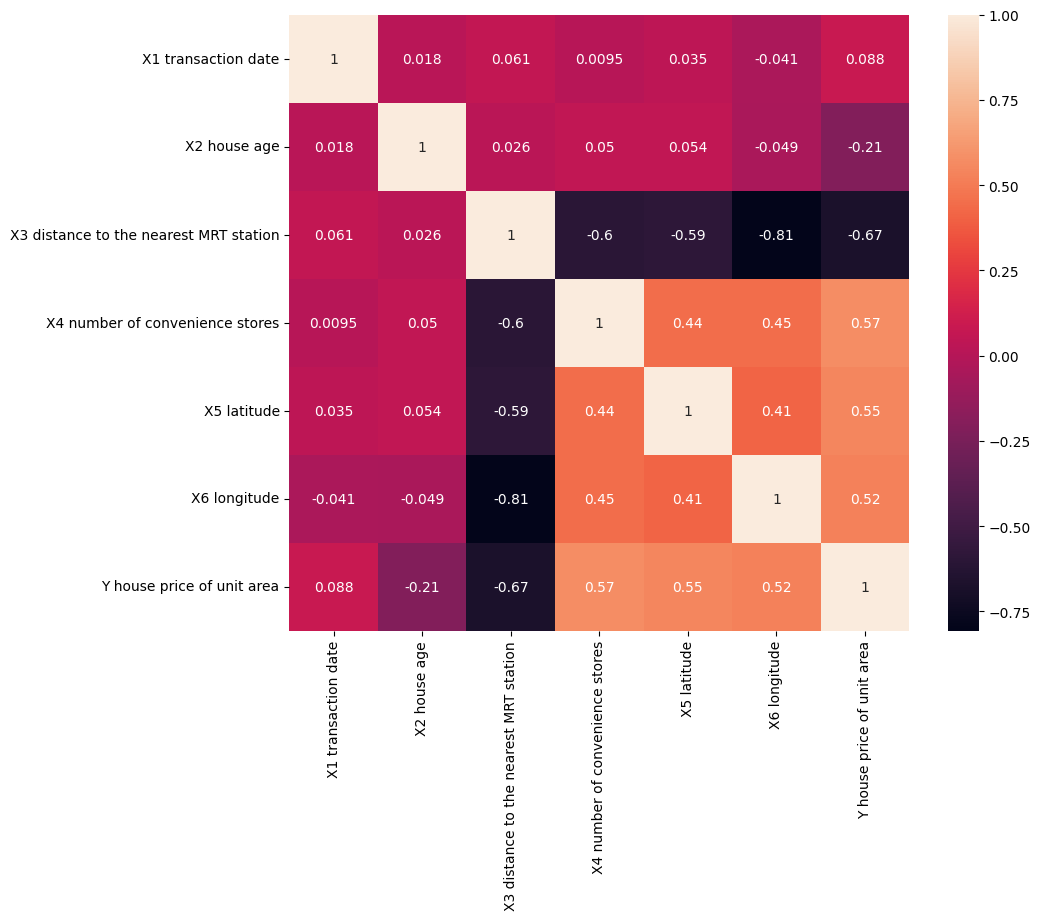

In [119]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [120]:
X = df
y = df['Y house price of unit area']# целевая переменная
X = X.drop('Y house price of unit area', axis=1)# признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test# 331 строка на оубчение и 83 строки на валидацию

(192     42.7
 234     23.9
 5       32.1
 45      38.3
 245     40.8
        ...  
 71      40.8
 106     47.1
 270    117.5
 348     53.7
 102     54.4
 Name: Y house price of unit area, Length: 331, dtype: float64,
 358    45.1
 350    42.3
 373    52.2
 399    37.3
 369    22.8
        ... 
 31     25.0
 283    23.5
 157    35.6
 203    46.1
 208    26.2
 Name: Y house price of unit area, Length: 83, dtype: float64)

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [121]:
df['X4 number of convenience stores'] = df['X4 number of convenience stores'].astype('category')
df = df.drop('X1 transaction date', axis=1)
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


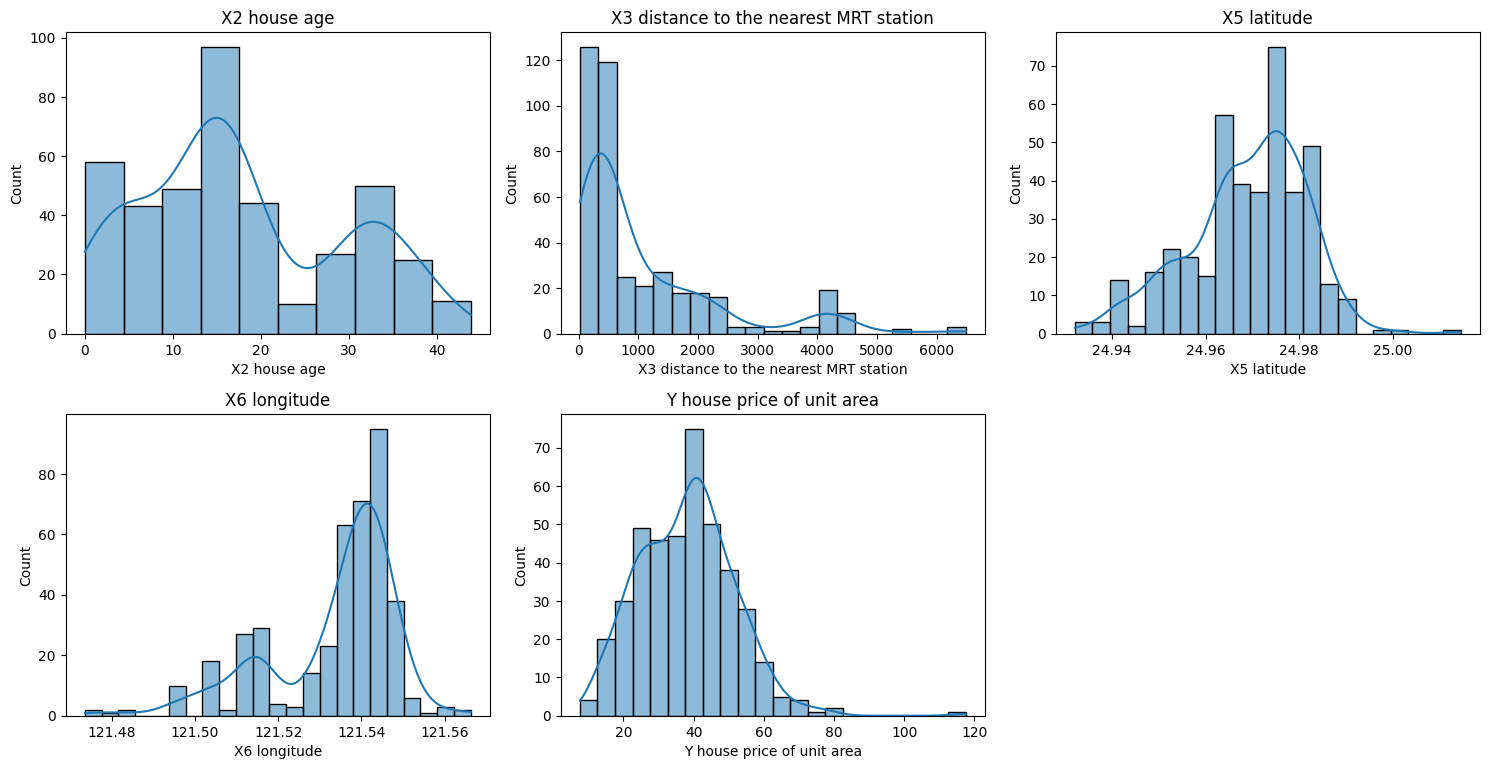

In [122]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

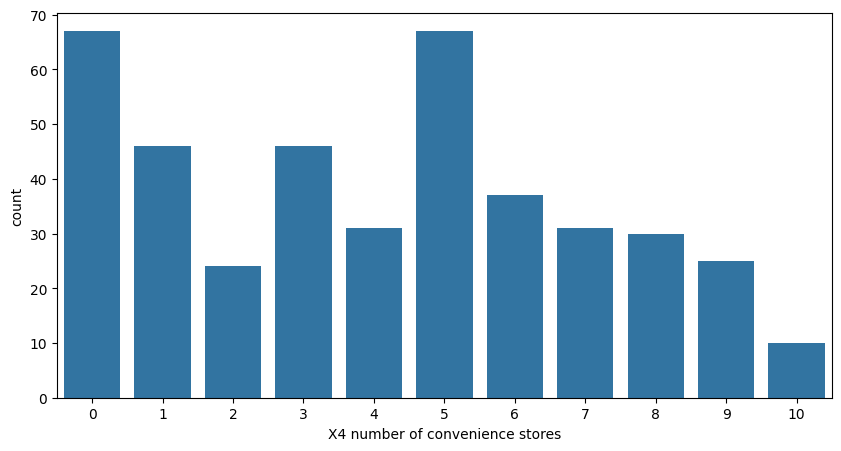

In [123]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4 number of convenience stores')

plt.show()

<Axes: >

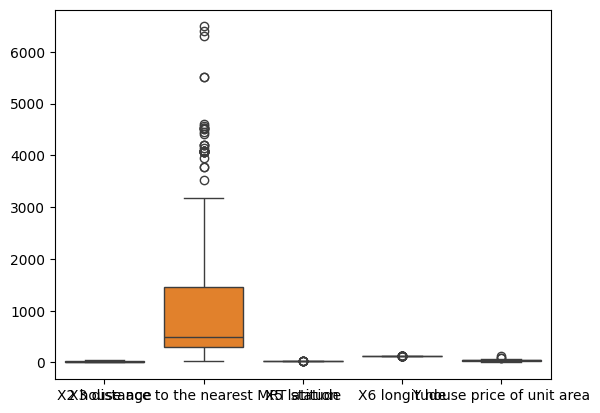

In [124]:
sns.boxplot(data=df)

In [125]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X2 house age                            414 non-null    float64 
 1   X3 distance to the nearest MRT station  414 non-null    float64 
 2   X4 number of convenience stores         414 non-null    category
 3   X5 latitude                             414 non-null    float64 
 4   X6 longitude                            414 non-null    float64 
 5   Y house price of unit area              414 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 17.1 KB


In [127]:
def transform_dataframe(df):
  required_columns = ['X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']
  # Создание копии DataFrame, чтобы не изменять исходный df
  df_transformed = df.copy()

  # Преобразование первых четырех признаков с помощью StandardScaler
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(df_transformed[required_columns[:]])

  # Преобразование 'ph_bins' с помощью pd.get_dummies
  age_bins_dummies = pd.get_dummies(df_transformed['X2 house age'], prefix='age')
  number_of_convenience_stores_bins_dummies = pd.get_dummies(df_transformed['X4 number of convenience stores'], prefix='number of convenience stores')
  # Объединение масштабированных признаков и dummy переменных
  df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:])
  df_transformed = pd.concat([df_transformed, age_bins_dummies], axis=1)
  df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)
  return df_transformed

df_research = transform_dataframe(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])
df_research = pd.concat([df_research, df['Y house price of unit area'], ], axis=1)

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']])
number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4 number of convenience stores'], prefix='number of convenience stores')
# Объединение масштабированных признаков и dummy переменных
df_transformed = pd.DataFrame(scaled_features, columns=['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude'])
df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

df_y = df['Y house price of unit area'].reset_index()
df_vivod = pd.concat([df_transformed,df_y['Y house price of unit area'] , ], axis=1)
df_vivod

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,number of convenience stores_0,number of convenience stores_1,number of convenience stores_2,number of convenience stores_3,number of convenience stores_4,number of convenience stores_5,number of convenience stores_6,number of convenience stores_7,number of convenience stores_8,number of convenience stores_9,number of convenience stores_10,Y house price of unit area
0,1.255628,-0.792495,1.125430,0.448762,0,0,0,0,0,0,0,0,0,0,1,37.9
1,0.157086,-0.616612,0.912444,0.401139,0,0,0,0,0,0,0,0,0,1,0,42.2
2,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,47.3
3,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,54.8
4,-1.117223,-0.549997,0.834188,0.592937,0,0,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-2.216993,-1.927835,1,0,0,0,0,0,0,0,0,0,0,15.4
410,-1.064493,-0.788071,0.427579,0.635341,0,0,0,0,0,0,0,0,0,1,0,50.0
411,0.095568,-0.549678,0.822893,0.423972,0,0,0,0,0,0,0,1,0,0,0,40.6
412,-0.844784,-0.776684,-0.184755,0.476814,0,0,0,0,0,1,0,0,0,0,0,52.5


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.describe()

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,37.980193
std,11.392485,1262.109595,0.012410,0.015347,13.606488
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,9.025000,289.324800,24.963000,121.528085,27.700000
50%,16.100000,492.231300,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,25.014590,121.566270,117.500000


In [130]:
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [131]:
df_research.describe()

,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,age_0.0,age_1.0,age_1.1,age_1.5,age_1.7,age_1.8,age_1.9,...,number of convenience stores_2,number of convenience stores_3,number of convenience stores_4,number of convenience stores_5,number of convenience stores_6,number of convenience stores_7,number of convenience stores_8,number of convenience stores_9,number of convenience stores_10,Y house price of unit area
count,4.140000e+02,4.140000e+02,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-1.265762e-16,1.343166e-13,-1.614537e-12,0.041063,0.002415,0.012077,0.004831,0.002415,0.002415,0.002415,...,0.057971,0.111111,0.074879,0.161836,0.089372,0.074879,0.072464,0.060386,0.024155,37.980193
std,1.001210e+00,1.001210e+00,1.001210e+00,0.198676,0.049147,0.109363,0.069421,0.049147,0.049147,0.049147,...,0.233971,0.314650,0.263515,0.368746,0.285625,0.263515,0.259568,0.238490,0.153715,13.606488
min,-8.412787e-01,-2.981805e+00,-3.903223e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000
25%,-6.303115e-01,-4.864845e-01,-3.441981e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.700000
50%,-4.693493e-01,1.669943e-01,3.437301e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.450000
75%,2.938267e-01,6.796928e-01,6.487148e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.600000
max,4.287008e+00,3.675611e+00,2.146891e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,117.500000


In [132]:
df_research

,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,age_0.0,age_1.0,age_1.1,age_1.5,age_1.7,age_1.8,age_1.9,...,number of convenience stores_2,number of convenience stores_3,number of convenience stores_4,number of convenience stores_5,number of convenience stores_6,number of convenience stores_7,number of convenience stores_8,number of convenience stores_9,number of convenience stores_10,Y house price of unit area
0,-0.792495,1.125430,0.448762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,37.9
1,-0.616612,0.912444,0.401139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,42.2
2,-0.414015,1.486860,0.688183,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,47.3
3,-0.414015,1.486860,0.688183,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,54.8
4,-0.549997,0.834188,0.592937,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2.378365,-2.216993,-1.927835,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.4
410,-0.788071,0.427579,0.635341,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
411,-0.549678,0.822893,0.423972,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,40.6
412,-0.776684,-0.184755,0.476814,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,52.5


In [133]:
y = df_vivod['Y house price of unit area']
X = df_vivod.drop('Y house price of unit area', axis=1)
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [134]:
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [135]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 6.339704852416496,
 'MSE': 83.11097569289842,
 'R2': 0.5581330550666481,
 'mape (reverted - % верно угаданых)': 80.92807192393026,
 'mape (original - % ошибок)': 19.071928076069742}

In [136]:
model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 5.305232952584752,
 'MSE': 53.502252361179515,
 'R2': 0.6810781244679265,
 'mape (reverted - % верно угаданых)': 82.81795774082241,
 'mape (original - % ошибок)': 17.182042259177592}

In [137]:
df_vivod

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,number of convenience stores_0,number of convenience stores_1,number of convenience stores_2,number of convenience stores_3,number of convenience stores_4,number of convenience stores_5,number of convenience stores_6,number of convenience stores_7,number of convenience stores_8,number of convenience stores_9,number of convenience stores_10,Y house price of unit area
0,1.255628,-0.792495,1.125430,0.448762,0,0,0,0,0,0,0,0,0,0,1,37.9
1,0.157086,-0.616612,0.912444,0.401139,0,0,0,0,0,0,0,0,0,1,0,42.2
2,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,47.3
3,-0.387791,-0.414015,1.486860,0.688183,0,0,0,0,0,1,0,0,0,0,0,54.8
4,-1.117223,-0.549997,0.834188,0.592937,0,0,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,-0.352637,2.378365,-2.216993,-1.927835,1,0,0,0,0,0,0,0,0,0,0,15.4
410,-1.064493,-0.788071,0.427579,0.635341,0,0,0,0,0,0,0,0,0,1,0,50.0
411,0.095568,-0.549678,0.822893,0.423972,0,0,0,0,0,0,0,1,0,0,0,40.6
412,-0.844784,-0.776684,-0.184755,0.476814,0,0,0,0,0,1,0,0,0,0,0,52.5


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""